In [4]:
!pip install transformers torch torchvision

In [14]:

from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt
import numpy as np


In [5]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [15]:
image_url = "https://i.ytimg.com/vi/SfLV8hD7zX4/maxresdefault.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
candidate_labels = ["a photo of a cat", "a photo of a dog", "a photo of a car"]
inputs = processor(text=candidate_labels, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

In [16]:
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

In [17]:
for label, prob in zip(candidate_labels, probs[0]):
    print(f"{label}: {prob.item():.4f}")

a photo of a cat: 0.0010
a photo of a dog: 0.9989
a photo of a car: 0.0000


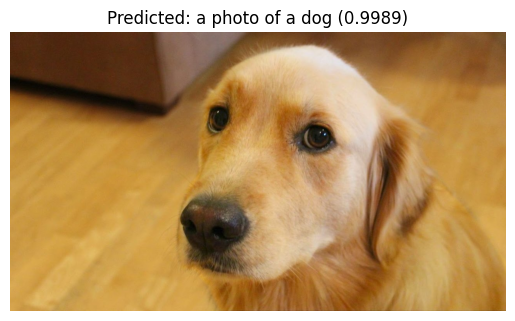

In [18]:
plt.imshow(np.array(image))
plt.title(f"Predicted: {candidate_labels[torch.argmax(probs)]} ({max(probs[0]):.4f})")
plt.axis('off')
plt.show()

In [13]:

print("Performing error analysis...")
for i, label in enumerate(candidate_labels):
    if probs[0][i] < 0.5:
        print(f"Low confidence on label '{label}': {probs[0][i].item():.4f}")

Performing error analysis...
Low confidence on label 'a photo of a dog': 0.0097
Low confidence on label 'a photo of a car': 0.0000
